# Plot Throughput

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : September 25th   2022
- last update : September 25th2022


### 

- **kernel anaconda3_auxtel** at CC or **python 3** locally

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

from astropy import units as u

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
filename = "AuxTel-throughput.xlsx"

In [4]:
df = pd.read_excel(filename,header=1,index_col=0)

In [5]:
df.reset_index(inplace=True)

In [6]:
df['index'] = df.reset_index().index

In [7]:
df.set_index('index')

,lambda,M1,M2,M3 (45°),windows per face,4 faces,total optics (except holo),holo,CCD,throughput,x10
index,,,,,,,,,,,
0,350,0.85,0.95,0.95,0.0125,0.05,0.728769,NaN,0.645,NaN,NaN
1,400,0.86,0.97,0.94,0.0125,0.05,0.744941,0.120,0.750,0.067045,0.670447
2,450,0.87,0.96,0.97,0.0125,0.05,0.769637,0.294,0.850,0.192332,1.923322
3,500,0.88,0.97,0.98,0.0125,0.05,0.794702,0.312,0.870,0.215714,2.157138
4,550,0.88,0.98,0.98,0.0125,0.05,0.802894,0.301,0.880,0.212671,2.126707
5,600,0.88,0.98,0.97,0.0125,0.05,0.794702,0.272,0.900,0.194543,1.945430
6,650,0.88,0.98,0.97,0.0125,0.05,0.794702,0.252,0.920,0.184244,1.842436
7,700,0.87,0.97,0.98,0.0125,0.05,0.785671,0.226,0.950,0.168684,1.686835
8,750,0.86,0.97,0.98,0.0125,0.05,0.776640,0.203,0.960,0.151352,1.513516


# Plot

In [8]:
wl = df["lambda"]
t_M1=df["M1"]
t_M2=df["M2"]
t_M3=df["M3 (45°)"]

In [9]:
t_window=df["4 faces"]
t_optic = df["total optics (except holo)"]

In [10]:
t_holo=df["holo"]
t_CCD=df["CCD"]
t_throughput=df["throughput"]

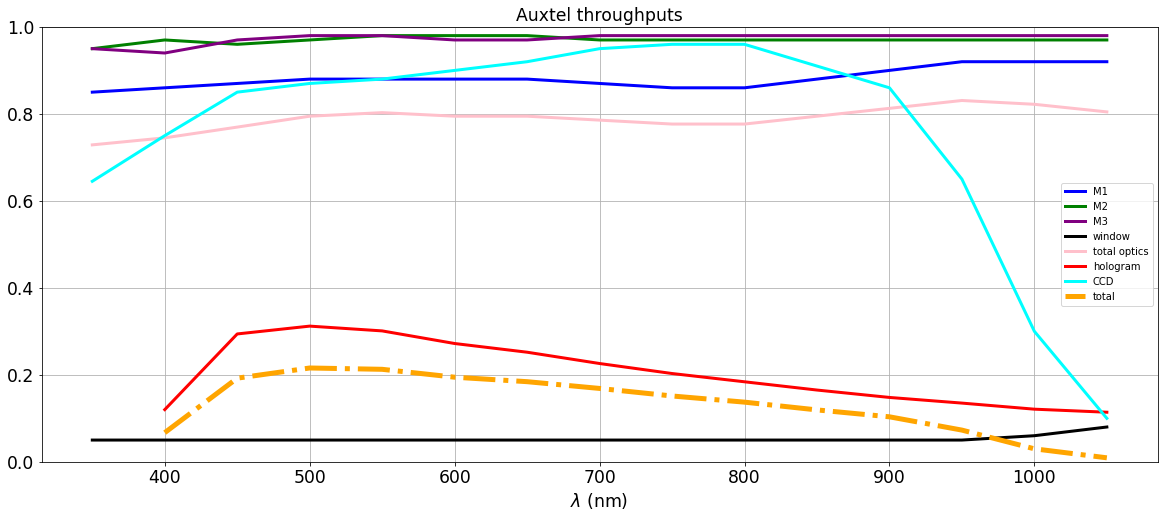

In [14]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(1,1,1)

ax.plot(wl,t_M1,'b-',label="M1",lw=3)
ax.plot(wl,t_M2,'g-',label="M2",lw=3)
ax.plot(wl,t_M3,'-',color="purple",label="M3",lw=3)
ax.plot(wl,t_window,"k-",label="window",lw=3)
ax.plot(wl,t_optic,"-",color="pink",label="total optics",lw=3)
ax.plot(wl,t_holo,"r-",label="hologram",lw=3)
ax.plot(wl,t_CCD,"-",color="cyan",label="CCD",lw=3)
ax.plot(wl,t_throughput,"-.",color="orange",label="total",lw=5)
ax.set_ylim(0,1.0)
ax.legend()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel throughputs")
ax.grid()
plt.savefig("auxtel_throughput_linscale.png")
plt.show()

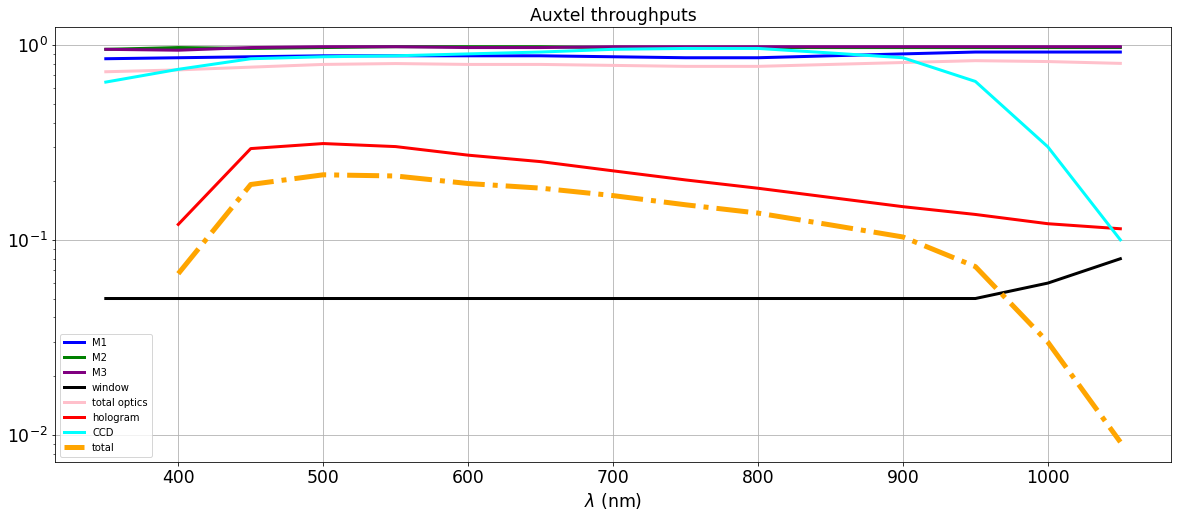

In [13]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(1,1,1)

ax.plot(wl,t_M1,'b-',label="M1",lw=3)
ax.plot(wl,t_M2,'g-',label="M2",lw=3)
ax.plot(wl,t_M3,'-',color="purple",label="M3",lw=3)
ax.plot(wl,t_window,"k-",label="window",lw=3)
ax.plot(wl,t_optic,"-",color="pink",label="total optics",lw=3)
ax.plot(wl,t_holo,"r-",label="hologram",lw=3)
ax.plot(wl,t_CCD,"-",color="cyan",label="CCD",lw=3)
ax.plot(wl,t_throughput,"-.",color="orange",label="total",lw=5)
ax.legend()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Auxtel throughputs")
ax.set_yscale("log")
ax.grid()
plt.savefig("auxtel_throughput_logscale.png")
plt.show()